<a href="https://colab.research.google.com/github/bhavani-mahalakshmi/AI-prep/blob/main/titanic_prediction_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [6]:
data = pd.read_csv("data_cleaned.csv")
data.shape

(891, 25)

In [7]:
data.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38.0,71.2833,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,1,26.0,7.9250,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,35.0,53.1000,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,35.0,8.0500,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1


In [8]:
x = data.drop(['Survived'], axis=1)
y = data['Survived']
x.shape, y.shape

((891, 24), (891,))

In [9]:
#Scale the features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() #scales down all values to between 0 & 1
x_scaled = scaler.fit_transform(x)

In [10]:
x = pd.DataFrame(x_scaled, columns=x.columns) #since scaler gives an array, we need to convert it back into dataframe
x.head()

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0.271174,0.014151,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.472229,0.139136,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.321438,0.015469,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.434531,0.103644,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.434531,0.015713,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [11]:
from sklearn.model_selection import train_test_split
#stratify to make sure the target y is equally distributed positive and negative classes between train and test
train_x, test_x, train_y, test_y = train_test_split(x, y, random_state=30, stratify=y)
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((668, 24), (223, 24), (668,), (223,))

In [12]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import f1_score

In [13]:
clf = KNN(n_neighbors=5)
clf.fit(train_x, train_y)
predict_y = clf.predict(test_x)
k = f1_score(predict_y, test_y)
print("f1 score ", k)

f1 score  0.6909090909090908


In [14]:
def elbow(range_k):
  test_errors = []
  for i in range_k:
    clf = KNN(n_neighbors=i)
    clf.fit(train_x, train_y)
    predict_y = clf.predict(test_x)
    k = f1_score(predict_y, test_y)
    e = 1 - k
    test_errors.append(e)
  return test_errors

In [15]:
range_k = range(6, 20, 2)
test = elbow(range_k)

Text(0.5, 1.0, 'Elbow curve for test')

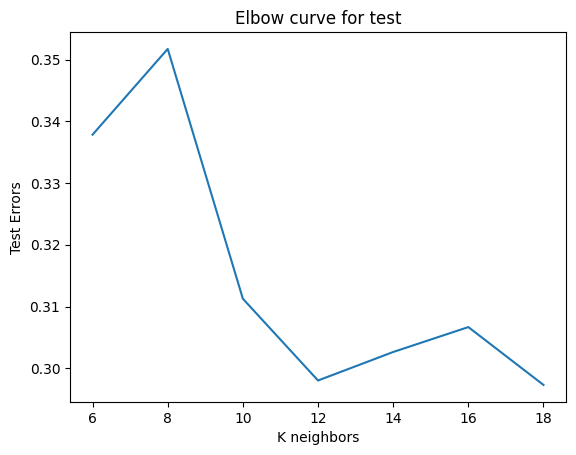

In [16]:
plt.plot(range_k, test)
plt.xlabel("K neighbors")
plt.ylabel("Test Errors")
plt.title("Elbow curve for test")

In [17]:
clf = KNN(n_neighbors=12)
clf.fit(train_x, train_y)
predict_y = clf.predict(test_x)
k = f1_score(predict_y, test_y)
print("f1 score ", k)

f1 score  0.7019867549668873


In [18]:
def f1_scores(range_k):
  train_f1, test_f1 = [], []
  for i in range_k:
    clf = KNN(n_neighbors=i)
    clf.fit(train_x, train_y)
    predict_y = clf.predict(train_x)
    k = f1_score(predict_y, train_y)
    train_f1.append(k)

    predict_y = clf.predict(test_x)
    k = f1_score(predict_y, test_y)
    test_f1.append(k)
  return test_f1, train_f1


In [19]:
r = range(1, 150)
train_f1, test_f1 = f1_scores(r)

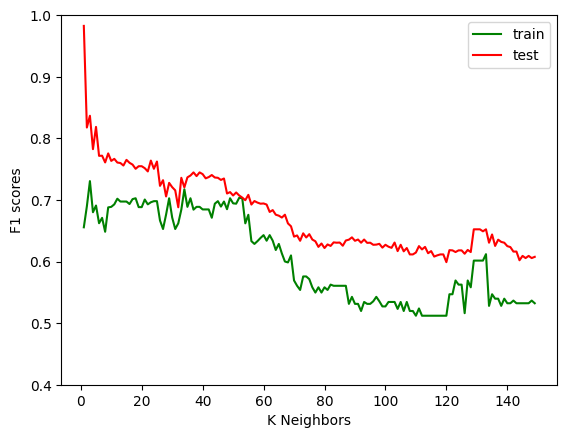

In [20]:
plt.plot(r, train_f1, color='green', label='train')
plt.plot(r, test_f1, color='red', label='test')
plt.xlabel('K Neighbors')
plt.ylabel('F1 scores')
plt.ylim(0.4,1)
plt.legend()